<a href="https://colab.research.google.com/github/SubhamMohanty187/Data-Science/blob/main/Projects/Case_Study3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question-3> After re-analysing the dataset you found out that some investors have invested in the 
same startup at different number of funding rounds. So before finalising the previous list, you 
want to improvise it by finding the top 5 investors who have invested in different number of 
startups. This list will be more helpful than your previous list in finding the investment for 
your friend startup. Find the top 5 investors who have invested maximum number of times in 
different companies. That means, if one investor has invested multiple times in one startup, 
count one for that company. 
There are many errors in startup names. Ignore correcting all, just handle the important ones -
Ola, Flipkart, Oyo and Paytm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
files = files.upload()

Saving startup_funding.csv to startup_funding.csv


In [ ]:
data = pd.read_csv("startup_funding.csv")
df = data.copy()
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [ ]:
df.loc[df["InvestorsName"]=="Undisclosed investors"]

In [ ]:
#correcting major startup names
df['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
df['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
df['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
df['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
df['StartupName'].replace("Olacabs", "Ola", inplace = True)
df['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
df['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
df['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

In [ ]:
df.dropna(inplace=True, subset=["StartupName","InvestorsName"])
df.reset_index(drop=True, inplace=True)

In [ ]:
#function to create dictionary of investor name making investment to different startups
def Create(startup_name, Investor_name):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None: #no startup is still funded by this investor
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li   
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i]
            
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:  #no startup is still funded by this investor
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:         #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li 
                
    return cnt

In [ ]:
my_dict = Create(df["StartupName"],df["InvestorsName"])

In [ ]:
invest = pd.DataFrame(list(my_dict.values()),list(my_dict.keys()))

In [ ]:
invest = invest.sort_values(by=[0],ascending=False)

In [ ]:
x = []
y = []

#we have to just find top 5 investors who invest maximum number of times in different startups
for i in range(5):
    x.append(invest.index[i])
    y.append(invest.values[i][0])
print(x)
print(y)

['Sequoia Capital', 'Accel Partners', 'Kalaari Capital', 'Indian Angel Network', 'Blume Ventures']
[48, 47, 41, 40, 36]


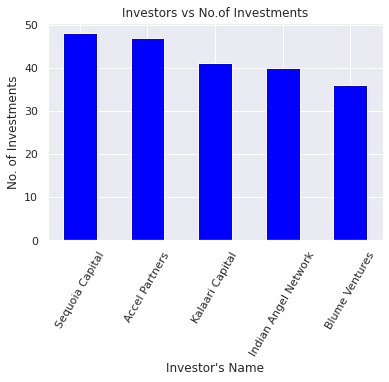

In [ ]:
plt.bar(x,y,color="Blue",width=0.5)
plt.xlabel("Investor's Name")
plt.ylabel("No. of Investments")
plt.xticks(rotation=60)
plt.title("Investors vs No.of Investments")


plt.show()

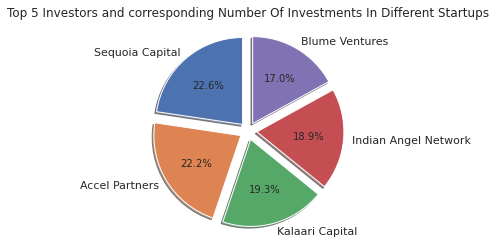

In [ ]:
plt.pie(y, labels = x,startangle=90, shadow = True, explode = (0.1, 0.1, 0.1, 0.1,0.1), autopct = "%.1f%%")
plt.grid()
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups")
plt.show()

In [ ]:
li = list(zip(x,y))
new_df = pd.DataFrame(li , columns=["Investors","No.of Investments"])
new_df

,Investors,No.of Investments
0,Sequoia Capital,48
1,Accel Partners,47
2,Kalaari Capital,41
3,Indian Angel Network,40
4,Blume Ventures,36
